In [92]:
#import relevant libraries
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing

#plt.style.use("fivethirtyeight")

sns.set()

In [93]:
existing = pd.read_excel("Employee Attrition.xlsx", sheet_name = "Existing employees")
left = pd.read_excel("Employee Attrition.xlsx", sheet_name = "Employees who have left")

(-1.1767528411760426,
 1.1015876642558335,
 -1.1808120593309681,
 1.10384819330147)

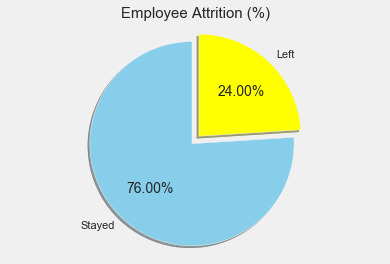

In [130]:
#piechart
sum_info = len(left) + len(existing)
i = round(len(existing)/sum_info, 2)
j = round(len(left)/sum_info, 2)
labels = ["Stayed", "Left"]
sizes = [i, j]
colours = ["skyblue", "yellow"]

plt.figure()
plt.pie(sizes, explode = (0.1, 0), labels = labels, autopct = "%1.2f%%", colors = colours, shadow = True, startangle= 90)
plt.title("Employee Attrition (%)", fontsize = 15)
plt.axis("equal")

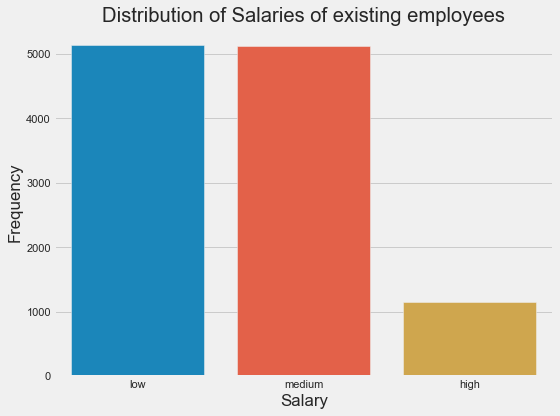

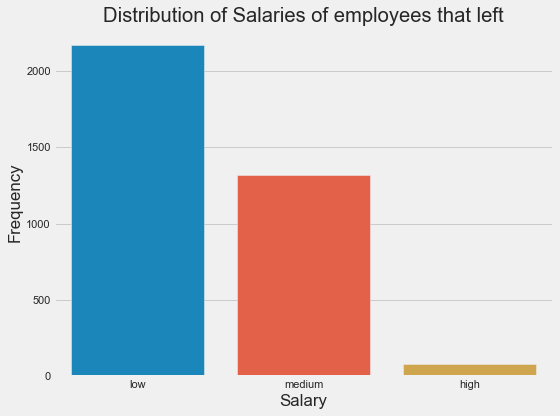

In [95]:
#barplot
#existing employees
plt.figure(figsize = (8,6))
sns.countplot(existing["salary"])
plt.title("Distribution of Salaries of existing employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")

plt.tight_layout()

#employess that left
plt.figure(figsize = (8,6))
sns.countplot(left["salary"])
plt.title("Distribution of Salaries of employees that left")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")

plt.tight_layout()
#from the plots, in general the employees who stayed had better remuneration than those who left. 

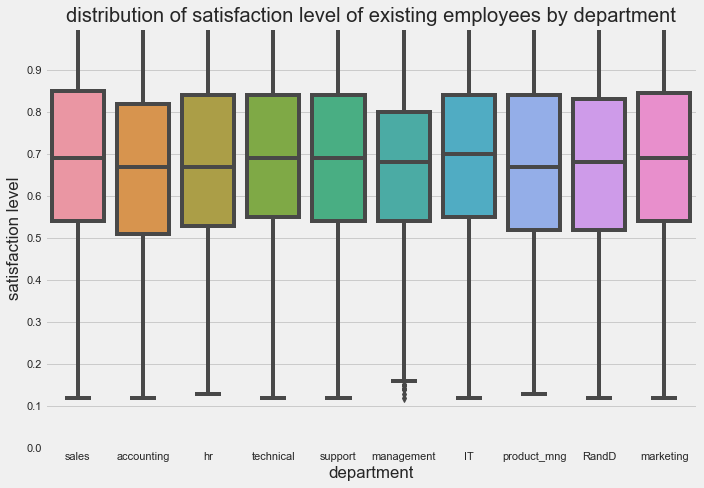

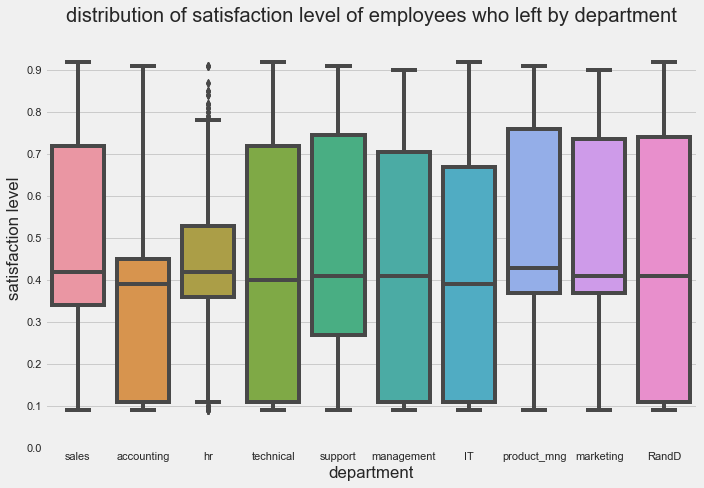

In [5]:
#boxplot
#existing employees
plt.figure(figsize = (10,7))
sns.boxplot(x = "dept", y = "satisfaction_level", data = existing)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, 0.1))
plt.tight_layout()
plt.title("distribution of satisfaction level of existing employees by department")
plt.xlabel("department")
plt.ylabel("satisfaction level")
plt.tight_layout()



#employees who left
plt.figure(figsize = (10,7))
sns.boxplot(x = "dept", y = "satisfaction_level", data = left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, 0.1))
plt.tight_layout()
plt.title("distribution of satisfaction level of employees who left by department")
plt.xlabel("department")
plt.ylabel("satisfaction level")
plt.tight_layout()

#there is more variation in the satisfaction level of employees who left by department than those who stayed. 
#the average satisfaction level of employees who stayed is almost the same in each department 
#the average satisfaction level of employees who left varies significantly by department.With Managment, IT, RandD, support
#, technical having the largest variations. 

In [96]:
#dropping the employee ID column
left.drop(["Emp ID"], axis = 1, inplace = True)
existing.drop(["Emp ID"], axis = 1, inplace = True)

In [101]:
print("The average satisfaction level of employees who left:",round(left["satisfaction_level"].mean(),2))
print("The average satisfaction level of employees who stayed:",round(existing["satisfaction_level"].mean(),2))
#on average, those who  left had a lower satisfaction level
#let's check why their satisfaction level differ

The average satisfaction level of employees who left: 0.44
The average satisfaction level of employees who stayed: 0.67


In [98]:
#Mapping the categorical variables to a number for easy analysis
left["salary"] = left["salary"].map({"low": 0, "medium":1, "high":2})
existing["salary"] = existing["salary"].map({"low": 0, "medium":1, "high":2})

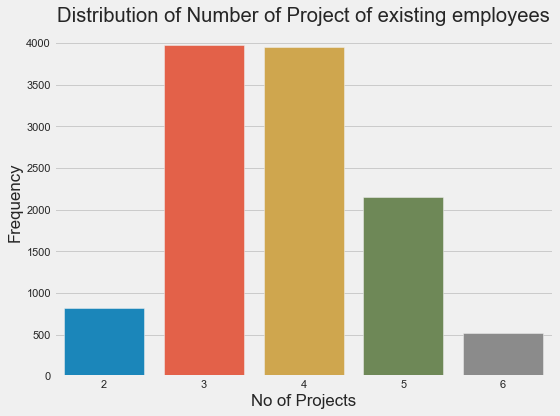

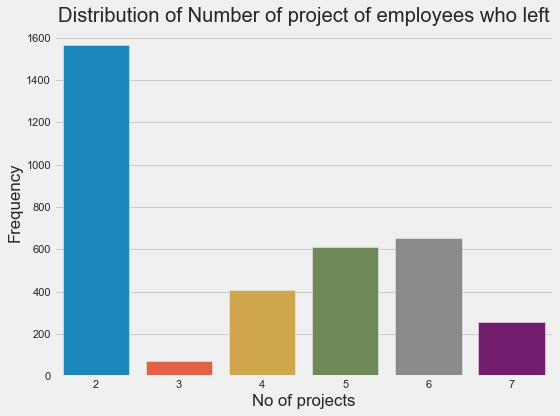

In [100]:
#barplot of employees
#existing employees
plt.figure(figsize = (8,6))
sns.countplot(existing["number_project"])
plt.title("Distribution of Number of Project of existing employees")
plt.xlabel("No of Projects")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")
plt.tight_layout()

#employees who left
plt.figure(figsize = (8,6))
sns.countplot(left["number_project"])
plt.title("Distribution of Number of project of employees who left")
plt.xlabel("No of projects")
plt.ylabel("Frequency")
plt.style.use("fivethirtyeight")
plt.tight_layout()
#majority of the employees had lower or too much projects to do. 

Text(0, 0.5, 'Average Satisfaction')

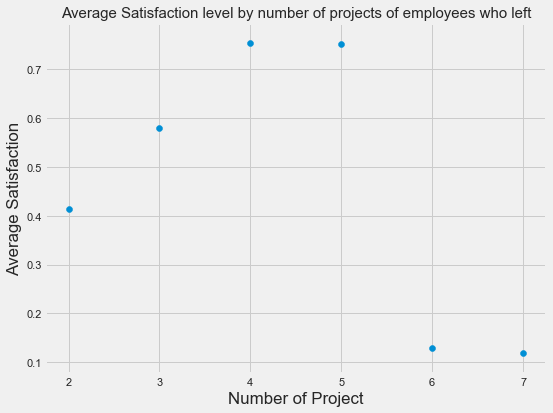

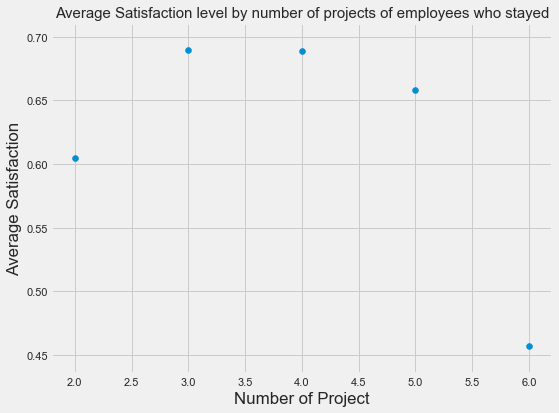

In [40]:
#scatterplot of employees
#employees who left
v = left.groupby(["number_project"])["satisfaction_level"]
v.mean()

y1 = v.mean().values
x1 = v.mean().index
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by number of projects of employees who left", fontsize = 15)
plt.xlabel("Number of Project")
plt.ylabel("Average Satisfaction")
#The highest satisfaction came when the number of projects were 4 and 5. Anything outside those gave low satisfaction level



#employees who stayed
h = existing.groupby(["number_project"])["satisfaction_level"]
h.mean()

y1 = h.mean().values
x1 = h.mean().index
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by number of projects of employees who stayed", fontsize = 15)
plt.xlabel("Number of Project")
plt.ylabel("Average Satisfaction")
#for employees who left, the highest satisfaction came when the number of projects were 4 and 5. 
#Anything outside those gave low satisfaction level
#for the employees who stayed, the ones doing below and above 3-4 projects are more prone to leave because of their
#low satisfaction level

Text(0, 0.5, 'Average Satisfaction')

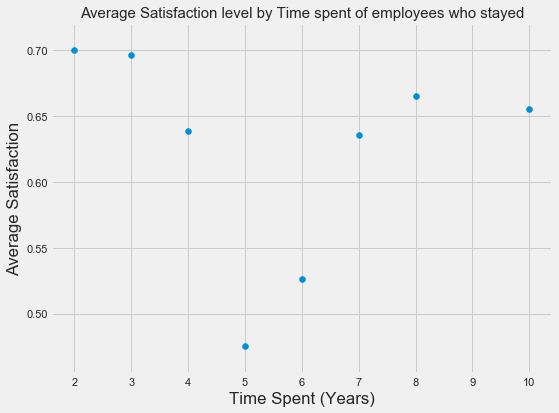

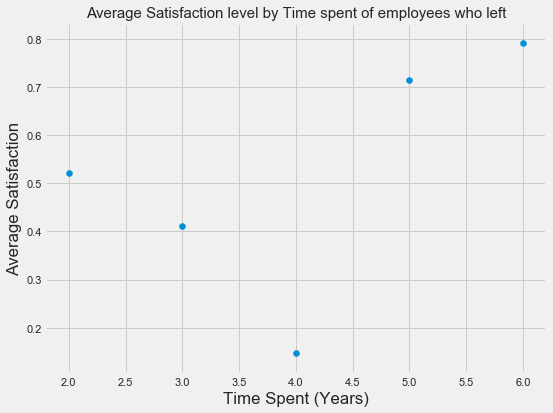

In [45]:
#Scatterplot
#employees who stayed
h = existing.groupby(["time_spend_company"])["satisfaction_level"]
h.mean()

y1 = h.mean().values
x1 = h.mean().index
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by Time spent of employees who stayed", fontsize = 15)
plt.xlabel("Time Spent (Years)")
plt.ylabel("Average Satisfaction")

#employees who left
v = left.groupby(["time_spend_company"])["satisfaction_level"]
v.mean()

y1 = v.mean().values
x1 = v.mean().index
plt.figure(figsize = (8,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by Time spent of employees who left", fontsize = 15)
plt.xlabel("Time Spent (Years)")
plt.ylabel("Average Satisfaction")

#for the employees who left, the average satisfaction level dropped steadily from 2-4 years, 
#but rose significantly from 5-6 years


#for the employees who stayed, the average satisfaction level dropped steadily from 2-5 years, 
#but rose significanyly from 7-10 years. 
#thus those who are prone to leaving are those who have spent between 3-5 years. 

In [105]:
left["promotion_last_5years"] = left["promotion_last_5years"].map({0:"No", 1:"Yes"})
existing["promotion_last_5years"] = existing["promotion_last_5years"].map({0:"No", 1:"Yes"})

Text(0, 0.5, 'Average Satisfaction')

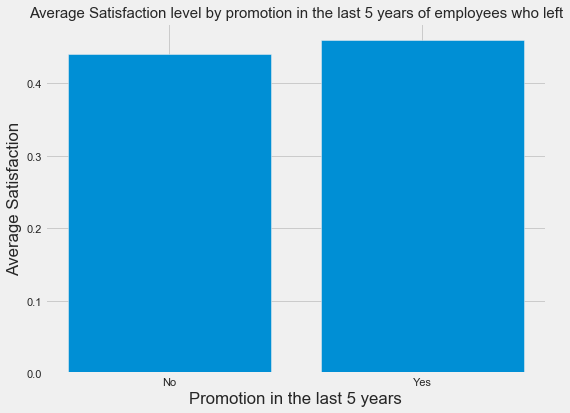

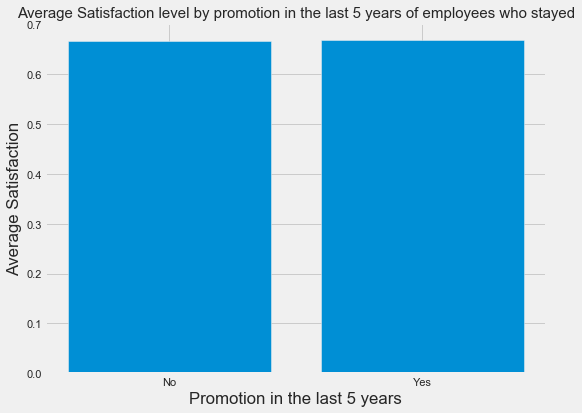

In [55]:
#employees who left
v = left.groupby(["promotion_last_5years"])["satisfaction_level"]
v.mean()

y1 = v.mean().values
x1 = v.mean().index
plt.figure(figsize = (8,6))
plt.bar(x1,y1)
plt.title("Average Satisfaction level by promotion in the last 5 years of employees who left", fontsize = 15)
plt.xlabel("Promotion in the last 5 years")
plt.ylabel("Average Satisfaction")

#employees who stayed
h = existing.groupby(["promotion_last_5years"])["satisfaction_level"]
h.mean()

y1 = h.mean().values
x1 = h.mean().index
plt.figure(figsize = (8,6))
plt.bar(x1,y1)
plt.title("Average Satisfaction level by promotion in the last 5 years of employees who stayed", fontsize = 15)
plt.xlabel("Promotion in the last 5 years")
plt.ylabel("Average Satisfaction")
#for the employees who left, for those who have and have not received promotion in the last 5 years
#Their satisfaction level was around 0.5


#for the employees who stayed, for those who have and have not received promotion in the last 5 years
#Their satisfaction level was around 0.65.
#those who are prone to leave are those who have not received promotion in the last 5 years

In [56]:
left.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

Text(0, 0.5, 'Average Satisfaction Level')

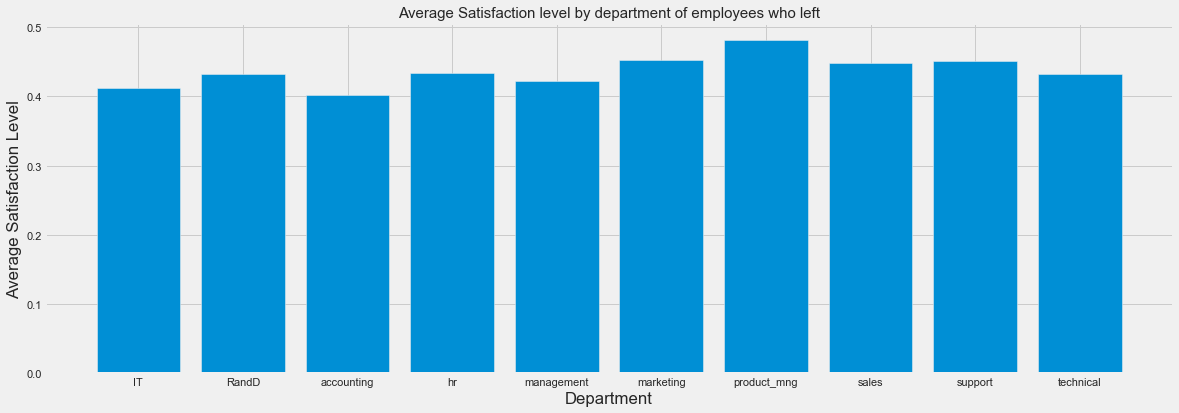

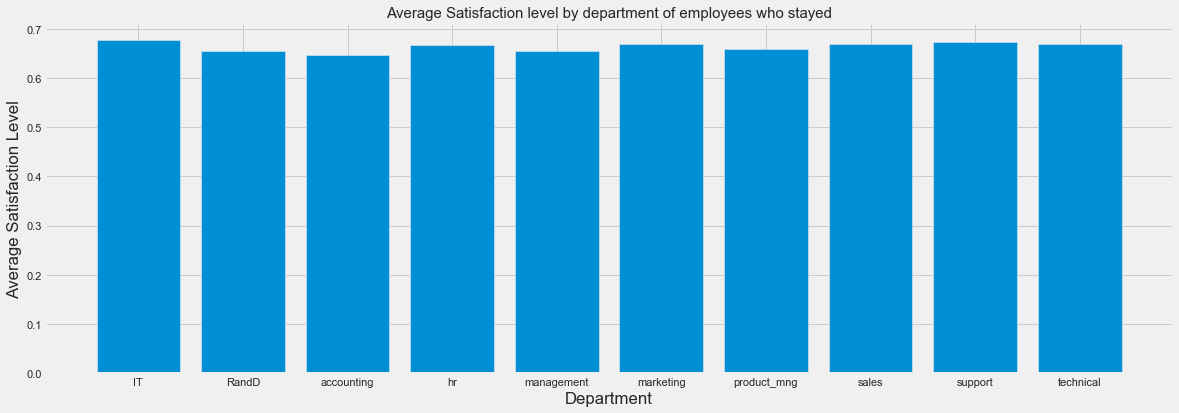

In [62]:
#barplot
#employees who left
v = left.groupby(["dept"])["satisfaction_level"]
v.mean()

y1 = v.mean().values
x1 = v.mean().index
plt.figure(figsize = (18,6))
plt.bar(x1,y1)
plt.title("Average Satisfaction level by department of employees who left", fontsize = 15)
plt.xlabel("Department")
plt.ylabel("Average Satisfaction Level")

#employees who stayed
h = existing.groupby(["dept"])["satisfaction_level"]
h.mean()

y1 = h.mean().values
x1 = h.mean().index
plt.figure(figsize = (18,6))
plt.bar(x1,y1)
plt.title("Average Satisfaction level by department of employees who stayed", fontsize = 15)
plt.xlabel("Department")
plt.ylabel("Average Satisfaction Level")
#for the employees who left, their average satisfaction level by department was less than 0.5
#with IT and accounting having the lowest

#for the employees who stayed, their average satisfaction level by department was more than 0.6
#almost the same for every department.So those who are more prone to leave are those whose functions requires high level 
#expertise and knowledge. 

Text(0, 0.5, 'Average Satisfaction Level')

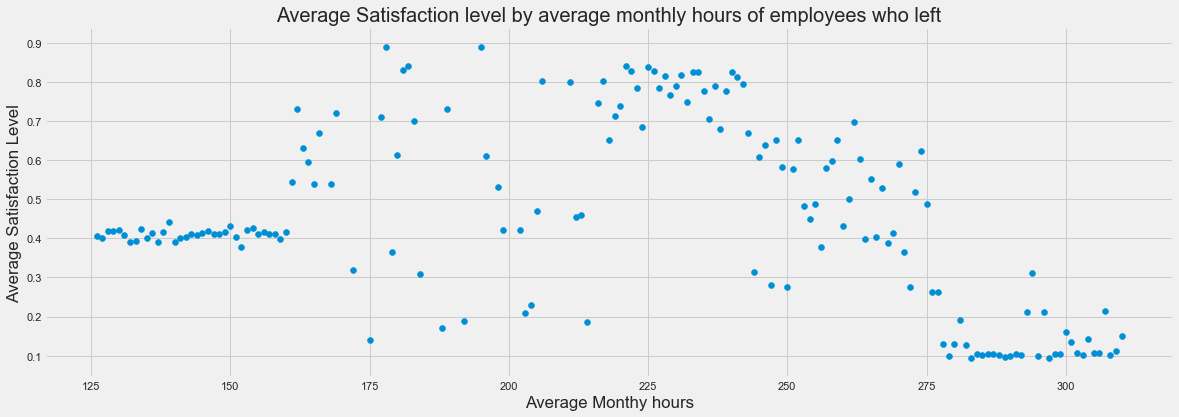

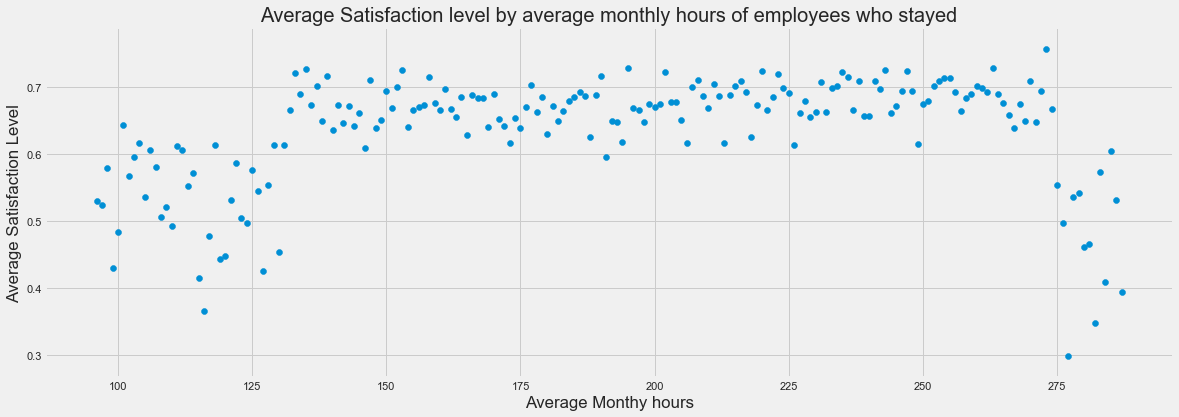

In [74]:
#employees who left
v = left.groupby(["average_montly_hours"])["satisfaction_level"]
v.mean()

y1 = v.mean().values
x1 = v.mean().index

plt.figure(figsize = (18,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by average monthly hours of employees who left", fontsize = 20)
plt.xlabel("Average Monthy hours")
plt.ylabel("Average Satisfaction Level")

#employees who stayed
h = existing.groupby(["average_montly_hours"])["satisfaction_level"]
h.mean()

y1 = h.mean().values
x1 = h.mean().index
plt.figure(figsize = (18,6))
plt.scatter(x1,y1)
plt.title("Average Satisfaction level by average monthly hours of employees who stayed", fontsize = 20)
plt.xlabel("Average Monthy hours")
plt.ylabel("Average Satisfaction Level")

#for the employees who left, their satisfaction level was high when their average monthly hours was between 175-225 hours
#Anything outside that range led to a decreased satisfaction level 

#for the employees who stayed, their satisfaction level was high when their average monthly hours was between 130-275hours
#those who are prone to leaving are those who work below or above these hours because of decreased satisfaction level.  

In [102]:
#remapping
left["Work_accident"] = left["Work_accident"].map({0:"No", 1: "Yes"})
existing["Work_accident"] = existing["Work_accident"].map({0:"No", 1:"Yes"})

In [103]:
#remapping
existing["salary"] = existing["salary"].map({0:"Low", 1:"Medium", 2:"High"})
left["salary"] = left["salary"].map({0:"Low", 1:"Medium", 2:"High"})

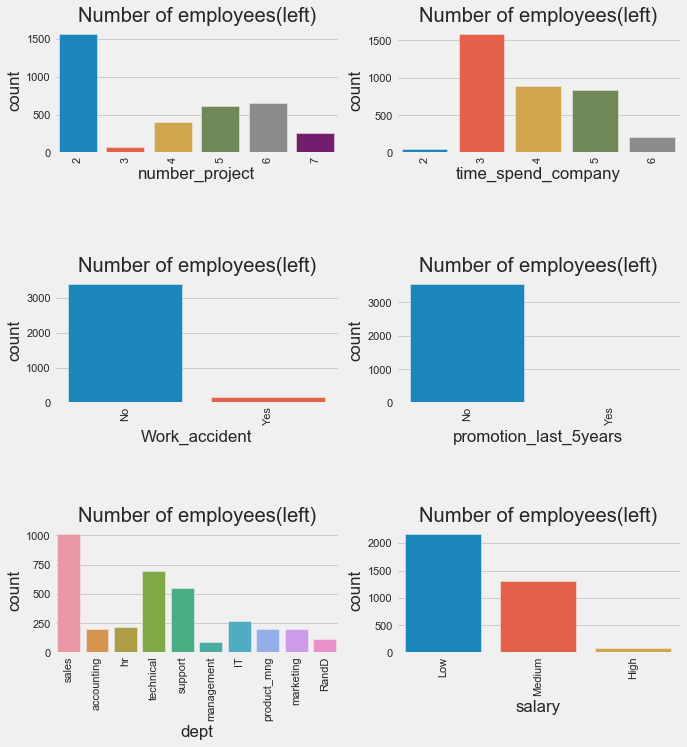

In [106]:
#faster visualisation of the results for those who left
features=['number_project', 'time_spend_company', 'Work_accident','promotion_last_5years', 'dept', 'salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = left, alpha = 1)
    plt.xticks(rotation=90)
    plt.title("Number of employees(left)")

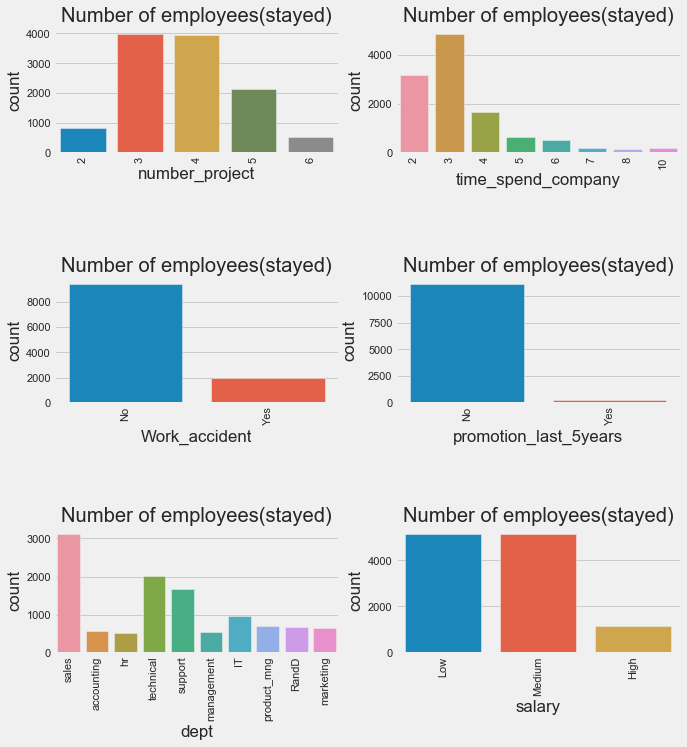

In [107]:
#faster visualisation of the results for those who stayed
features=['number_project', 'time_spend_company', 'Work_accident','promotion_last_5years', 'dept', 'salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = existing, alpha = 1)
    plt.xticks(rotation=90)
    plt.title("Number of employees(stayed)")